# The Wonder of Math
##### Appreciate the wonder of math while learning a little bit of Python

---

If you are a fan of the comedy show *The Big Bang Theory*, you might remember the answer of the following trivia question:

> What is the best number according to Sheldon Copper?

Well, the answer is 73. 

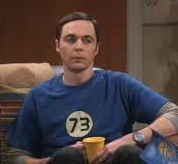

Here's the reason proposed by Sheldon:

- It's the 21st prime number
- Its mirror 37 is the 12th prime number
- 12 is the mirror of 21
- 7 x 3 is 21
- 73 is a palindrome in its binary form, 1001001

---

As it turns out, Sheldon only touched the surface of 73. There's a mystery of the beauty of mathematics within. 

In this Python Jupyter lab, we're gonna explore this mystery. And at the same time, for those who are not familiar with Python, this serves as a brief introduction to the programming language. 



## Basics

First, some basic math

- 37 x 73 = 2701
- Sum of mirror: 2701 + 1072 = 3773
- Interesting relation here, 3773 from 37 & 73
- 37: 12th prime; 73: 21st prime
- 12 & 21 are mirrors
- 12<sup>2</sup> = 144; 21<sup>2</sup> = 441
- 144 & 441 are mirrors 

In [1]:
# Defining variables is straightforward
a = 37
b = 73
print(f'37 x 73 == {a * b}')
print(f'2701 + 1072 == {2701 + 1072}')

37 x 73 == 2701
2701 + 1072 == 3773


## Fasten your seatbelts. It's gonna get wild.

You shall be amazed by 37, 73 and 2701.

In [2]:
import numpy as np
import functools as ft
import time

In [3]:
# list is an important data structure in Python
aList = [913, 203, 86, 401, 395, 407, 296]

In [4]:
# Define some anonymous functions
mulOp = lambda i,j: i*j
prod = lambda lst: ft.reduce(mulOp, lst)

In [5]:
def splitIntByThousand(i: int):
    q = i
    assert i > 0
    ret = []
    while q:
        r = q % 1000
        ret.append(r)
        q = q // 1000
    return ret

def sumOfThousand(i: int):
    return sum(splitIntByThousand(i))

sumOfThousand(prod(aList))

2701

This list `[913, 203, 86, 401, 395, 407, 296]` we are examining here has some interesting mathematical properties.

- The sum of thousands of `prod(aList)` is 2701
- The sum of thousands of `sum(aList)` is 703

> So what's special about `2701` and `703`?

- Since `37 x 2 - 1 == 73`, 2701 is a triangular number.
- In fact, it's the 73rd triangular number `T(73)`.
- 703 is `T(37)`
    - 703 == 37 x 19
    - 19 x 2 - 1 == 37

where $T(n) = \sum_{i=1}^n i$

---

Now let's examine the interesting property of `703`.

In [6]:
i703 = sumOfThousand(sum(aList))
for i in range(1, 17):
    tmp = sumOfThousand(i703 ** i)
    print(i, tmp, sumOfThousand(tmp))

1 703 703
2 703 703
3 1702 703
4 1702 703
5 2701 703
6 2701 703
7 2701 703
8 3700 703
9 4699 703
10 4699 703
11 6697 703
12 4699 703
13 6697 703
14 3700 703
15 4699 703
16 5698 703


# 703 & 999

Let: $sot(x) = sumOfThousand(x)$

We have: $sot(sot(703^n)) = 703$ for all integer `n > 0`

- The same property holds for `999`

In [7]:
for i in range(1, 17):
    tmp = sumOfThousand(999 ** i)
    print(i, tmp, sumOfThousand(tmp))

1 999 999
2 999 999
3 1998 999
4 1998 999
5 2997 999
6 2997 999
7 3996 999
8 3996 999
9 4995 999
10 4995 999
11 5994 999
12 5994 999
13 6993 999
14 6993 999
15 7992 999
16 8991 999


In [8]:
def sumOfIntDigit(i: int):
    return sum([int(s) for s in str(i)])

print(sum([sumOfIntDigit(i) for i in aList]))

print(sum([sumOfIntDigit(i) for i in splitIntByThousand(prod(aList))]))
print(sum([sumOfIntDigit(j) for j in [sumOfIntDigit(i) for i in splitIntByThousand(prod(aList))]]))

82
73
37


## Curiouser and curiouser
- Sum of digits for the list is `82`. Remember this number, more fun later
- Split `prod(aList)` by thousands, sum of the sum of digits is: 73
- Sum of the second sum of digits of the split above is: 37

## Let's have some more fun with prime numbers

- We build some dictionaries for prime numbers
- `i2prm` maps prime index -> prime number
- `prm2i` maps prime number -> prime index

In [9]:
# set is also a Python data structure
interestingNumbers = {37, 73, 2701}

In [10]:
# Here is an example of reading from text file
def readPrimes():
    def gen():
        with open('primes.txt', 'r') as fp:
            for line in fp:
                line = line.strip()
                if not line:
                    continue
                if '#' == line[0]:
                    continue
                if line.startswith('end'):
                    continue
                for s in line.split():
                    yield int(s)

    return np.fromiter(gen(), dtype=np.int64)

primes = readPrimes()
# 
i2prm = {i+1:p for i,p in enumerate(primes)}
prm2i = {p:i+1 for i,p in enumerate(primes)}
maxPrmInDict = max(list(prm2i.keys()))

In [11]:
ipsumi = prm2i[sum([i2prm[x] for x in aList])]
print(26 * 62, ipsumi)
print(26 * 62 + ipsumi)

1612 2161
3773


In [12]:
def printMidInt(i: int):
    assert i > 1, i
    print(i)
    if i & 1:
        printMidInt((1 + i) // 2)
    else:
        print('=== end')

printMidInt(2701)
print(26 ** 2)

2701
1351
676
=== end
676


In [13]:
def sum_x_rev_x(x: int):
    la = list(str(x))
    lb = reversed(la)
    return int(''.join(la)) + int(''.join(lb))

sum_x_rev_x(ipsumi)

3773

- sum of the `i-th` prime number for each `i` in `aList` is the 2161st prime number
- sum of mirror: 2161 + 1612 == 3773, again the number `3773`
- 1612 == 26 x 62, note 26 & 62 are mirrors
- the mid of `2701` is `1351`; the mid of `1351` is `676`
- 676 == 26<sup>2</sup>

---

## Now let's dive into $\pi$

We'll use Python to query $\pi$ from the following websites:
- https://pi.delivery/#apifetch
- http://www.subidiom.com/pi/pi.asp

In [14]:
import requests
import bs4

In [15]:
def searchIrtn(query, cst='pi', start=0, sleep=3.7):
    query = str(query)
    assert cst in ('pi', 'sqrt2', 'e', 'phi'), cst
    time.sleep(sleep)
    url = f'http://www.subidiom.com/pi/piday.asp?s={query}&p={start}&c={cst}'
    txt = requests.get(url)
    htmlStr = txt.content.decode()
    
    soup = bs4.BeautifulSoup(htmlStr, 'html.parser')
    for c in soup.p.children:
        line = str(c)
        if 'appears at' in line:
            digits = [s for s in line if s.isdecimal()]
            break
    
    for c in soup.p.next_sibling.children:
        if c.font:
            results = c.font.contents[:3]
            break
    results[1] = query

    ret = int(''.join(digits)), results

    if 'pi' == cst and sleep:
        # verify using the other website
        ref = getPiDigit(ret[0], len(query), sleep=0)
        assert ref == query, (ret, ref)

    return ret

In [16]:
def getPiDigit(start=0, size=1, sleep=3.7):
    url = f'https://api.pi.delivery/v1/pi?start={start}&numberOfDigits={size}'

    ret = requests.get(url).json()['content']
    time.sleep(sleep)

    # verify using the other website
    if sleep:
        ref = searchIrtn(ret, start=start, sleep=0)
        assert ret == ref[1][1], (ret, ref)

    return ret

## With the ability to query $\pi$, let's have some fun here

- For those who are familiar with numbers and algebra
- 111 == 37 x 3
- Let's do something with `[111, 222, 333, ..., 777, 888, 999]`

In [17]:
xxxs = [i * 3 * 37 for i in range(1, 10)]
print(xxxs)
sum([i2prm[i] for i in xxxs])

[111, 222, 333, 444, 555, 666, 777, 888, 999]


37073

In [18]:
piPosxxxs = [searchIrtn(i)[0] for i in xxxs]

In [19]:
print(piPosxxxs)
sum(piPosxxxs)

[153, 1735, 1698, 2707, 177, 2440, 1589, 4751, 762]


16012

## Now that's some interesting information

- Treat `111 ~ 999` as prime index, and the sum is the `37073th` prime number
- Search the first occurence of `111 ~ 999` in $\pi$, and the sum of indicies is `16012`
- Note how `3773` & `1612` pop up again in a different way

## Now let's fetch lots of $\pi$ digits and have some fun

In [20]:
pi0_666 = getPiDigit(0, 666, sleep=0)

In [21]:
def sumStrDigits(dis: str, start=0, end=-1, pow=1):
    dis = dis[1:]
    return sum([int(s)**pow for s in dis[start:end]])

print(sumStrDigits(pi0_666, 0, 611))
print(sumStrDigits(pi0_666, 17, 628))
print(sumStrDigits(pi0_666, 0, 17))
print(sumStrDigits(pi0_666, 611, 628))
print(sumOfThousand(int(pi0_666[1:14])))
print(2701 + 73)

2701
2701
82
82
2774
2774


## This is too much

- Sum of the first `611` digits of $\pi$: `2701`
- Sum of the first `611` digits of $\pi$ after skipping the first 17 digits: `2701`
- Which means: sum of 17 digits counting from start or starting from 611 are the same
- The number is `82`. More mystery about this number incoming....
- Sum of thousands of the first `13` digits of $\pi$ is: 2774 == 2701 + 73

---

## Keep on reading below. This has become totally inconceivable.
- We've already seen: the sum of thousands of `prod(aList)` is `2701`
- Adding the number `82` to the list: we still get `2701`
- Adding the number `82` again to the list: we still get `2701`
- The final product we get: its digit sum is `82`
- Sum of square of the first 82 digits of $\pi$ is `2701`, i.e., $\sum_{i=1}^{82} \pi_{digit}(i)^2 = 2701$

In [22]:
interestingNumbers.add(17)
interestingNumbers.add(82)

In [23]:
# Lists can be concatenated using `+` sign, and duplicated using `*` sign
print(sumOfThousand(prod(aList + [])))
print(sumOfThousand(prod(aList + [82])))
print(sumOfThousand(prod(aList + [82] * 2)))
print(sumOfIntDigit(prod(aList + [82] * 2)))

2701
2701
2701
82


In [24]:
sumStrDigits(pi0_666, pow=2, end=82)

2701

## Continue with $\pi$
- The first occurence of `2701` in $\pi$ is at position: `165`
- Starting from position `611`, sum of `165` digits are: `776`
- 776 == 611 + 165
- Since `2701` starts at position `165`, being length of 4 digits for `2701`, they actually occupy position `165 ~ 168`
- Sum of the 4 position indices are: `666`, again, divisible by `37`

---

- `165` is the mid point of `329`
- 165 x 329 = 54285
- The first occurence of `54285` in $\pi$ is at position: `2701`
- The first occurence of `270154285` in $\pi$ is at position: `856112701`
- Note here: 85-611-2701
- The number `611` & `2701` pop up again

In [25]:
pi611_811 = getPiDigit(611, 200, sleep=0)

In [26]:
idx2701 = searchIrtn(2701)[0]
print(idx2701)
print(sumStrDigits(pi611_811, end=idx2701))
print(611 + idx2701)
print(165+166+167+168)

165
776
776
666


In [27]:
mid = 165
fwd = 165 * 2 - 1
print(mid * fwd)
print(searchIrtn(mid * fwd)[0])

54285
2701


In [28]:
yaIdx = searchIrtn(270154285)[0]
print(yaIdx)
interestingNumbers.add(yaIdx)

856112701


## Final tastes of $\pi$ before we move on
- The sum of square of the first `165` digits of $\pi$ is: `4699`
- `4699` is divisible by `37`
- 4699 == 127 x 37
- 4699 == 2701 + 666 x 3
- The sum of thousands of `4699` is `703`
- 127 == 2<sup>7</sup> - 1
- `127` is a super prime
  - which means its prime index is always a prime, all the way recursively down to `2`
  - 127 - 31 - 11 - 5 - 3 - 2

---

## The center of gravity of T(73) triangle
Should you draw out the 73rd triangle with dots, the center of gravity would be dot No. `1201`.

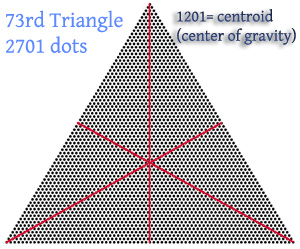

- `1201` is the `197th` prime number
- `197` first appears at position `37` of $\pi$
- The sequence is interesting: `19716939937`
    - Soon after `197`, there is `37`
    - The sequence between `197` & `37` is: `169399`
    - The digit sum of `169399` is: `37`
- The first `37` digit with even indices sums to `197`
- The first `37` digit with odd indices sums to `160`
- 160 == 197 - 37

In [29]:
print(sumStrDigits(pi0_666, pow=2, end=idx2701))
print(2701 + 666 * 3)
print(127 * 37)

superPrime = 127
while superPrime in prm2i:
    print(superPrime, prm2i[superPrime])
    superPrime = prm2i[superPrime]

4699
4699
4699
127 31
31 11
11 5
5 3
3 2
2 1


In [30]:
cntGrav = 1201
print(prm2i[cntGrav])

print(pi0_666[37:48])
print(pi0_666[37:40])
print(sumOfIntDigit(pi0_666[40:46]))
print(pi0_666[46:48])

197
19716939937
197
37
37


In [31]:
def dopi():
    a = np.array([int(s) for s in pi0_666[:100]])
    print(a[np.arange(1, 75, 2)].sum())
    print(a[np.arange(2, 75, 2)].sum())

dopi()

160
197


## More fun with the mysterious list

- If we sort each digit inside `aList`, we acquire this sequence: `00011223334456678999`
- Its sum of thousands is: `2701`
- Multiply by `28` and the result has sum of thousands: `2701`
- Multiply by `2701` and the result has sum of thousands: `2701`

---

## Wait, there is a little more about $\pi$
- First `3` digits, `141` sums to `6`
- First `7` digits, `1415926` sums to `28`
- The real divisors of `6` are `[1, 2, 3]`
  - 1 + 2 + 3 == 6
- The real divisors of `28` are `[1, 2, 4, 7, 14]`
  - 1 + 2 + 4 + 7 + 14 == 28
- 628 == 314 x 2, `314` happens to related to $\pi$ 3.14
- 628 == 611 + 17, which we've shown from above where $\pi$ has some interesting features regarding these two numbers

In [32]:
sortS = ''.join(sorted(list(''.join([str(i) for i in aList]))))
sortI = int(sortS)
print(sortS, sortI)
print(sumOfThousand(sortI))
print(sumOfThousand(sortI * 28))
print(sumOfThousand(sortI * 2701))
print(sumStrDigits(pi0_666, end=3))
print(sumStrDigits(pi0_666, end=7))
# 628 == 314 * 2   == 611 + 17

00011223334456678999 11223334456678999
2701
2701
2701
6
28


## So what's so special about this list?

- The last two numbers are divisible by `37`
- Let's calculate the sum of all 127 possible combinations of these 7 numbers
    - Of all possible sums of combinations, 23 of these sums are divisible by `37`
    - No other divisor greater than 6 has more than 20 counts
- Combinations for number can yield `777`, `888`, and twice with `999`
    - $86 + 395 + 296 = 777$
    - $86 + 395 + 407 = 888$
    - $203 + 401 + 395 = 999$
    - $913 + 86 = 999$
- `37` might have something to do with it

In [33]:
def sumdiv():
    a = np.array(aList)
    print(0 == a % 37)

    def gen():
        for i in range(1, 128):
            sl = list(f'{i:07b}')
            il = [int(s) for s in sl]
            yield a[np.array(il, bool)]

    permSum = np.array([sum(l) for l in gen()])
    divs = np.arange(1, 101).reshape(-1, 1)
    divTab = 0 == permSum % divs
    divCount = divTab.sum(1)
    goodDivIdx = np.nonzero(divTab.sum(1) >= 20)[0]

    print(np.vstack((goodDivIdx + 1, divCount[goodDivIdx])).transpose(1, 0))
    comb = np.nonzero(permSum % 37 == 0)[0] + 1
    print(comb)
    print(permSum[permSum % 37 == 0])
    for i in np.arange(1, 128)[(permSum % 111 == 0) & (permSum < 1000)]:
        sl = list(f'{i:07b}')
        il = [int(s) for s in sl]
        al = np.array(aList)[np.array(il, bool)]
        print(i, ''.join(sl), '\t',
              ' + '.join([str(n) for n in al]), f'= {al.sum()}')

sumdiv()

[False False False False False  True  True]
[[  1 127]
 [  2  63]
 [  3  42]
 [  4  31]
 [  5  25]
 [  6  25]
 [ 37  23]]
[  1   2   3  20  21  22  23  44  45  46  47  80  81  82  83 104 105 106
 107 124 125 126 127]
[ 296  407  703  481  777  888 1184  999 1295 1406 1702  999 1295 1406
 1702 1517 1813 1924 2220 1998 2294 2405 2701]
21 0010101 	 86 + 395 + 296 = 777
22 0010110 	 86 + 395 + 407 = 888
44 0101100 	 203 + 401 + 395 = 999
80 1010000 	 913 + 86 = 999


## More on 37 and stuff

- 703 + 666 == 37<sup>2</sup>
- `343` occurs at the `666th` position of $\pi$
- 343 == 7<sup>3</sup>
- `666` occurs at the `4000th` position of $\pi$
- 4000 - 343 x 9 == 913, which is the first number in `aList`

In [34]:
print(703 + 666 == 37 ** 2)
print(37 == 666 // (6+6+6))

True
True


In [35]:
print(getPiDigit(666, 3))
print(getPiDigit(4000, 3))
print(aList[0] == 4000 - 343 * 9)
print(aList[0])
print(343 == 7 ** 3)

343
666
True
913
True


In [36]:
interestingNumbers.add(611)
interestingNumbers.add(165)
interestingNumbers.add(165 * 2 - 1)
interestingNumbers

{17, 37, 73, 82, 165, 329, 611, 2701, 856112701}

## Well, even more on $\pi$ and $\sqrt 2$

- Sum of square of first `82` digits of $\pi$ is: `2701`
- Sum of square of next `83` digits of $\pi$ is: `1998`
- Sum of square of first `83` digits of $\sqrt 2$ is: `2701`
- Sum of square of next `82` digits of $\sqrt 2$ is: `1998`
- 82 + 83 == 165
- The sequence `1658382` is at position `3773611` of $\pi$
    - Note the sequence: `3773-611`

---

## 2701 & 1998 & 1899
- 2701 == 703 + 1998
- 2701 == 802 + 1899
- $1899 \div 703 \approx 2.701$
- $1899 \div 2701 \approx 0.703$
- 802 == 401 x 2
- 401 is in the middle of `aList`
- 913 + 1899 == 2701 + 73 + 37 + 1
  - 913 is the first number in `aList`
- 802 / 1998 == 0.401401401401....  (apparently no surprise here at all if you are familiar with algebra)

---

## 703, 666, 1998, 2701 & the T(73) triangle
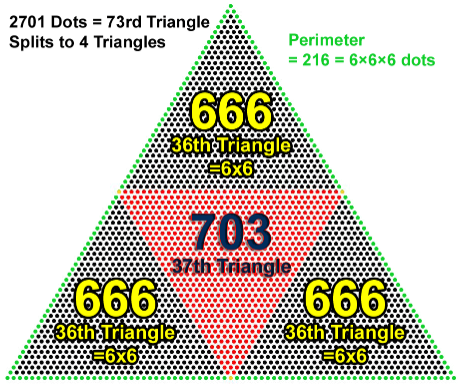

In [37]:
sq2_0_250 = '14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462309122970249248360558507372126441214970999358314132226659275055927557999505011527820605714701095599716059702745345968620147285174186408891986'
print(len(sq2_0_250))
print(sumStrDigits(pi0_666, end=82, pow=2))
print(sumStrDigits(pi0_666, start=82, end=165, pow=2))
print(sumStrDigits(sq2_0_250, end=83, pow=2))
print(sumStrDigits(sq2_0_250, start=83, end=165, pow=2))

251
2701
1998
2701
1998


In [38]:
print(searchIrtn(1658382)[0])

3773611


In [39]:
print(2701 == 802 + 1899)
print(2701 == 703 + 1998)
print(f'{1899 / 703:.7f}')
print(f'{1899 / 2701:.3f}')
print(802 // 2 in aList)
print(aList[0] + 1899 == 2701 + 73 + 37 + 1)
print(802 / 1998)

True
True
2.7012802
0.703
True
True
0.4014014014014014


## More trivia

- `165` first appears in position `238` of $\pi$
- 238 == 165 + 73
- immediately before `165` is: `83`
- `83` is the mid point of `165`
- `1201`, the center of gravity for T(73) shows up soon after `165`
- `157`, half of `314`, is the `37th` prime number

In [40]:
q165 = searchIrtn(165)

In [41]:
print(q165)
print(q165[0] == 165 + 73)
print(int(q165[1][0][-2:]) * 2 == 165 + 1)
print(str(cntGrav) in q165[1][-1])

(238, ['46128475648233786783', '165', '27120190914564856692'])
True
True
True


In [42]:
print(prm2i[314 // 2], 314 // 2)

37 157


## More on the special list
- First we do prime factorization for each number in `aList`
- Only the middle one `401` is prime; all others are composites
- Sum of all prime factors of the left three: 175
- Sum of all prime factors of the right three: 175
- 175 + 401 + 175 == 751, mirror of `175`
- Note: `37th` prime is `157`
- Alternate sum of all prime factors: `401`
- Alternate sum of all prime factors of left three: `-135`
- Alternate sum of all prime factors of right three: `-135`
- Alternate sum of all prime factors excluding `401`: `-270`

In [43]:
def getPrmFactors(n: int):
    assert 1 < n < (maxPrmInDict ** 2)

    if n in prm2i:
        return [n]
    if 0 == n & 1:
        return [2] + getPrmFactors(n // 2)
    for i in range(3, maxPrmInDict + 1, 2):
        if i not in prm2i:
            continue
        if 0 != n % i:
            continue
        return [i] + getPrmFactors(n // i)


def altSum(lol):
    a = np.hstack(lol)
    sign = np.arange(len(a))
    sign = sign % 2 * -2 + 1
    print('Calculating alt sum:')
    print(a)
    print(sign)
    print(a * sign)
    print(np.sum(a * sign))


def thisIsAmazing0():
    lpfs = [getPrmFactors(i) for i in aList]
    print(lpfs)
    left = sum([sum(l) for l in lpfs[:3]])
    right = sum([sum(l) for l in lpfs[-3:]])
    mid = aList[3]
    assert [mid] == lpfs[3]
    print((left, mid, right))
    print(left + right + sum(lpfs[3]))
    print(i2prm[37])
    altSum(lpfs)
    altSum(lpfs[:3])
    altSum(lpfs[-3:])
    altSum(lpfs[:3] + lpfs[-3:])

thisIsAmazing0()

[[11, 83], [7, 29], [2, 43], [401], [5, 79], [11, 37], [2, 2, 2, 37]]
(175, 401, 175)
751
157
Calculating alt sum:
[ 11  83   7  29   2  43 401   5  79  11  37   2   2   2  37]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
[ 11 -83   7 -29   2 -43 401  -5  79 -11  37  -2   2  -2  37]
401
Calculating alt sum:
[11 83  7 29  2 43]
[ 1 -1  1 -1  1 -1]
[ 11 -83   7 -29   2 -43]
-135
Calculating alt sum:
[ 5 79 11 37  2  2  2 37]
[ 1 -1  1 -1  1 -1  1 -1]
[  5 -79  11 -37   2  -2   2 -37]
-135
Calculating alt sum:
[11 83  7 29  2 43  5 79 11 37  2  2  2 37]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
[ 11 -83   7 -29   2 -43   5 -79  11 -37   2  -2   2 -37]
-270


## What if we calculate the index of all prime factors?
- `401` is the `79th` prime number
- Sum of left three: `57`
- Sum of right three: `57`
- Alt sum of all: `79`
- Alt sum of left three: `-37`
- Alt sum of right three: `-37`
- Alt sum of all excluding the middle prime: `-74`

In [44]:
def thisIsAmazing1():
    lpfs = [getPrmFactors(i) for i in aList]
    lpfids = [[prm2i[p] for p in lpf] for lpf in lpfs]
    print(lpfids)
    left = sum([sum(l) for l in lpfids[:3]])
    right = sum([sum(l) for l in lpfids[-3:]])
    mid = lpfids[3][0]
    print(left, mid, right)
    altSum(lpfids)
    altSum(lpfids[:3])
    altSum(lpfids[-3:])
    altSum(lpfids[:3] + lpfids[-3:])

thisIsAmazing1()

[[5, 23], [4, 10], [1, 14], [79], [3, 22], [5, 12], [1, 1, 1, 12]]
57 79 57
Calculating alt sum:
[ 5 23  4 10  1 14 79  3 22  5 12  1  1  1 12]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
[  5 -23   4 -10   1 -14  79  -3  22  -5  12  -1   1  -1  12]
79
Calculating alt sum:
[ 5 23  4 10  1 14]
[ 1 -1  1 -1  1 -1]
[  5 -23   4 -10   1 -14]
-37
Calculating alt sum:
[ 3 22  5 12  1  1  1 12]
[ 1 -1  1 -1  1 -1  1 -1]
[  3 -22   5 -12   1  -1   1 -12]
-37
Calculating alt sum:
[ 5 23  4 10  1 14  3 22  5 12  1  1  1 12]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
[  5 -23   4 -10   1 -14   3 -22   5 -12   1  -1   1 -12]
-74


## Let's manipulate the calculated results from above
- $1 \div 175 \approx 0.0057$
- $1 \div 57 \approx 0.0175$
- $1 \div 270 \approx 0.0037037037037$
- $1 \div 74 \approx 0.0135135135135$

---
## A little bit more...
- Prime factorization of the sum of the `2700th`, `2701st` & `2702nd` prime numbers is:
    - 3 x 3 x 3 x 37 x 73
- Sum of digits for the product of first three numbers in `aList`: `37`
- Sum of digits for the product of last four numbers in `aList`: `37`
- Sum of thousands for the product of last four numbers in `aList`: `703`

In [45]:
print(f'{1 / 175:.4f}')
print(f'{1 / 57:.4f}')
print(f'{1 / 270:.16f}')
print(f'{1 / 74:.16f}')

print(2700 + 2701 + 2702 == 2701 * 3)
print(getPrmFactors(sum([i2prm[i] for i in range(2700, 2703)])))
print(sumOfIntDigit(prod(aList[:3])))
print(sumOfIntDigit(prod(aList[3:])))
print(sumOfThousand(prod(aList[3:])))

0.0057
0.0175
0.0037037037037037
0.0135135135135135
True
[3, 3, 3, 37, 73]
37
37
703


## The answer of life, universe & everything might just be: `37`
##### FYI: not `42`

- Even some scientists have discovered that the number `37`, `703`, etc., are flowing inside our body 
- Here's what they have found hidden in the codon chart for DNA, RNA & protein translation

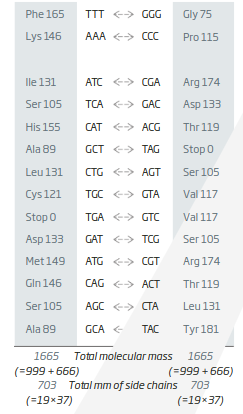
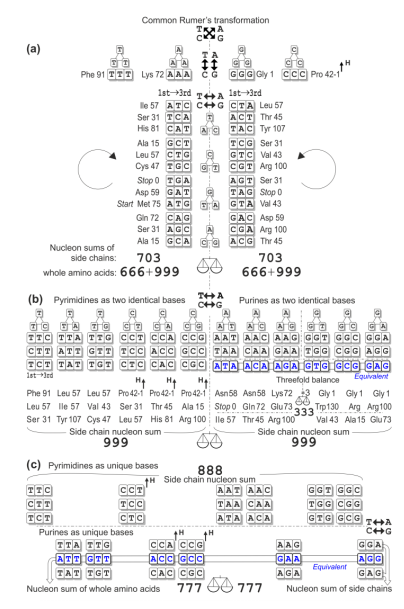

In [46]:
# Python supports unicode string quite well
unicodeStr = '🐂⛺🐫🚪🪟🪡🗡🪜🐍✊✋⚕🌊🐟🤺👀👄🪝🗣👱🦷❌'
uss = [
    '⛺👱🐂🦷✊❌',
    '⛺👱🐂',
    '🐂⚕🪟✊🌊',
    '🐂❌',
    '🪟🦷🌊✊🌊',
    '🪡🐂❌',
    '🪟🐂👱🪝',
]

def gmtRule(i: int):
    if i < 10:
        return i
    if i < 20:
        return (i - 9) * 10
    return (i - 18) * 100

gmt = {sym: gmtRule(i + 1) for i, sym in enumerate(unicodeStr)}
ogmt = {sym: i+1 for i, sym in enumerate(unicodeStr)}
sgmt = {sym: sumOfIntDigit(gmt[sym]) for sym in unicodeStr}
agmt = dict()

for i, sym in enumerate(unicodeStr):
    i = i - 1 if i else i
    agmt[sym] = gmt[unicodeStr[i]]

def numTrans(keymap=gmt, ustr=uss):
    return [sum([keymap[s] for s in ss]) for ss in ustr]

## The secret lies in these unicode characters

- Here we define in python dictionaries some transformation rules
- Each of the transformation converts a unicode character to a number
- Applying `gmt` transformation to the unicode str list, we would obtain the special `aList`
- Remember the sum of thousands of product of `aList`: `2701`
- Applying `agmt`, sum of thousands of product changes to: `1998`
- Applying `sgmt`, sum of the new list is: `82` (We've seen this special number before)

In [47]:
gmtList = numTrans()
print(gmtList == aList)
gmtList

True


[913, 203, 86, 401, 395, 407, 296]

In [48]:
print(sum(aList[-2:]))
print(sumOfThousand(prod(numTrans(agmt))))
print(sum(aList[:-2]))
print(sum(aList[:-2]) // 3)

703
1998
1998
666


In [49]:
sum(numTrans(sgmt))

82

## This unicode sequence is also related to $\pi$

- Perform a bit of calculation of the `gmt` transformed list
- We obtain a number quite close to $\pi$
- Relatively speaking, it's off by only 0.001%

---

- Certainly, something is hidden inside this particular unicode string list

---

## With a final transformation...
## The secret shall be revealed.
## Keep on reading.

In [50]:
def complexCalc():
    lol = [[gmt[s] for s in ss] for ss in uss]
    numerator = sum([len(ss) for ss in uss]) * prod([prod(l) for l in lol])
    denominator = len(aList) * prod(aList)
    ratio = numerator // denominator / 1e17
    print(f'{ratio:.5f}')
    π = 3.14159265
    print(f'{abs(ratio - π) / π * 100:.3f}%')

complexCalc()

3.14155
0.001%


In [51]:
def transRule():
    cst = 1488
    off = 0

    p2c = {}
    c2p = {}

    for i in range(22):
        n = cst + off + i
        c2p[chr(n)] = unicodeStr[i]
        if i in (10, 12, 13, 16, 17):
            p2c[unicodeStr[i]] = [chr(n), chr(n + 1)]
            c2p[chr(n + 1)] = unicodeStr[i]
            off += 1
        else:
            p2c[unicodeStr[i]] = [chr(n)]

    return p2c, c2p

p2c, c2p = transRule()

def translate(ustr: str):
    if 1 == len(ustr):
        return p2c[ustr][-1]
    ret = [p2c[c][-1] for c in ustr]
    ret[-1] = p2c[c2p[ret[-1]]][0]
    return ''.join(ret)

print(translate('🐂'), translate('❌'), translate('🐂❌'))
print('Notice the unicode language of choice reads from right to left!')

def symbolify(ustr):
    return ''.join([c2p[us] for us in ustr])

he = ' '.join([translate(us) for us in uss])

hel = he.split()
actual = [symbolify(w) for w in hel]
assert actual == uss
sum(numTrans(ustr=actual, keymap=gmt))

א ת את
Notice the unicode language of choice reads from right to left!


2701

## The final transformation is done.

The secret to all of this is stored in the Python variable `he`.

---

## Here is goes.

In [52]:
he

'בראשית ברא אלהים את השמים ואת הארץ'

## The answer to all of this
---
> בראשית ברא אלהים את השמים ואת הארץ

---

## Or in English

---

> In the beginning God created the heavens and the earth. *(Gen 1:1)*


## The revelation

So there you have it. 

You have been shown a glimpse of what the Almighty God of the Bible from high above is capable of. 

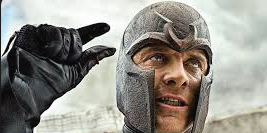

These mathematical properties have been hidden inside the first verse of the Bible for 3500 years, from the time of Moses - the author of Torah, to this generation where for the first time in human history, people are able to appreciate the brilliance behind all of this with the advancement of computer technology. 

- So either you accept that Moses was an absolute genius in mathematics and linguistics, who could compute all the digits of $\pi$ and discover all the related mystery behind the Hebrew language, and who could also, by the way, divide the Red Sea;

- Or you might have to admit that human beings are not the real authors of the Bible. 

---

## To nonbelievers
All you've been shown is facts and nothing more. It might still not be enough to convince you, whether you're an atheist all together, or you just simply don't believe in the Bible. 

But it will be very hard for you to shake that feeling from now on, the feeling that the Bible might just be the word of God, because facts like this are very hard to deny. 

I pray that one day, you will accept the God of the Bible and utter the prayer down below this document. 

## To Christians 
My dear brothers and sisters in Christ, some of you might have been struggling with the book of Genesis for a long time. You might have been **falsely** led to believe:

- Genesis is not scientifically accurate
- We shouldn't take the Bible literally
- Secular scientists are right
- …

Fear not. Those are all false statements. Don't let the world tell you what is right or wrong. The truth in science never contradicts with the Bible. Whoever claims otherwise is not a very good scientist. 

Our God is faithful and all powerful. These secrets, hidden since the beginning of creation, are exactly for time like this for you to see. They are way beyond the capabilities of all human beings' intelligence combined. And they are definitive proof that what we believe in the Bible is correct.

Forget the so-called "scientific theories". Don't be scared by any of those things. If you're gonna fear, fear the LORD:

> The fear of the LORD is the beginning of wisdom. *(Prov 9:10)*

I pray that this document would be a blessing to your faith. Ask God to help you build up your faith in his Word daily. If you feel you've been blessed by this message, pray this prayer from your heart:

> Dear Heavenly Father, thank you for delivering this message for me. My faith was once shaken by the world's theories, and I thank you for helping me overcome that. I ask the Holy Spirit to help me grow in faith, to help me study your Word and to help me live in Christ daily. I pray in the name of your son Jesus Christ. Amen!

---

## To those still in doubt
Many of you are still not convinced at this point. That's quite all right. 

In fact, God knows exactly your internal struggle. If you are willing to ask God for help, or better still, if you wanna challenge God on this one, go ahead and just do it, because:

> Whosoever calls upon the name of the LORD will be saved. *(Joel 2:32 / Rom 10:13)*

If you wanna ask God or challenge God, say this from your heart:

> Whoever is out there, I don't know if you are real. But if you are real and if you are who you say you are, come to me and change my heart. If you are truly all that powerful, I ask/challenge you to change my life. 

There you go. He will come, every time. 

---

## Take a leap of faith
To those who are ready to take a leap of faith:

Great news: you're one prayer away from being a child of God. 

So here's the gospel of Jesus Christ:

Men are created in God's image *(Gen 1:26)*, and we're supposed to reflect the glory of the almighty God. But men have sinned and fall short the glory of God *(Rom 3:23)*, and will face God's judgment one day. 

Since God is upright and just *(Deut 32:4)*, he cannot forgive sins without a price. But God is also love *(1 John 4:8)*, so he doesn't want any single human being to perish and face his eternal judgment. 

So he came down to the earth 2000 years ago. He became flesh and dwelled among us *(John 1:14)*, as a human being. Jesus Christ is the only sinless human being ever existed. He lived a life without sins and was obedient to God the Father's plan till death. 

So on that historic day, the day of crucifixion, he was tortured and nailed to the cross. He who knew no sin became sin *(2 Cor 5:21)*, and took the judgment we deserve on our behalf. Jesus was dead on the cross and was buried in earth for three nights and three days *(Mt 12:40)*. On the third day, God raised him from the dead as the acceptance for this ultimate sin offering, once and  for all, for all mankind: past, present and future. 

By the Grace of God, we are given freely this eternal forgiveness of all our sins, on one condition: 

Believe what Jesus did on the cross for you and confess him as your Lord and savior. 

> For God so loved the world, that he gave his only begotten Son, that whosoever believeth in him should not perish, but have everlasting life. *(John 3:16)*

> if thou shalt confess with thy mouth the Lord Jesus, and shalt believe in thine heart that God hath raised him from the dead, thou shalt be saved. *(Rom 10:9)*

## The sinner's prayer

If you're ready to accept what our Lord Jesus Christ has done for you on the cross, pray this prayer with all your heart:

> Dear Lord Jesus, I am a sinner. Now I repent from all my sins and ask for your forgiveness. I believe that you died on the cross for my sins and you rose from the dead. Come into my heart. I wanna trust you and follow you. From this day forward, you are my Lord and Savior for all eternity. I pray in your name, Amen!

If you just prayed that prayer, congratulations! You're now a born again Christian. Prepare to see the changes that God will do for you. All heavens rejoice for you for this very moment. 

Praise the Lord! Amen!

If you just got saved, we recommend you to join a local Bible believing church, or tell someone you know who is a devoted Christian. Obtain a copy of the Bible, or download a Bible App, and start reading daily. God bless you!

---

6000 years ago, a serpent in the garden of Eden, used his tongue to deceive Adam and Eve and caused humans to separate from God.

Now, I pray, by the tongue of another serpent, the Python tongue (pun intended for Harry Potter fans here), that many will come back to our Father's home. 

---

## The secret in those numbers
Some variables defined in Python are named intentionally. The unicode strings of emojis are also not random choices.

- Every hebrew letter is also a picture, hence the choice of emoji
- Every hebrew letter is also a number
    - `gmt`: gematria, or standard gematria
    - `ogmt`: ordinal gematira
    - `sgmt`: small gematria, or Gematria Ketana
    - `agmt`: Arizal's previous letter transformation

With these knowledge in mind, we shall see the secret in those numbers

In [53]:
interestingNumbers

{17, 37, 73, 82, 165, 329, 611, 2701, 856112701}

In [54]:
def calcGmt(ustr: str, keymap=gmt):
    return sum([keymap[s] for s in symbolify(ustr)])

print(calcGmt('בראשית'))
print(calcGmt('בראשית', agmt))
print(calcGmt('חכמה'))
print(calcGmt('חכמה', ogmt))
print(calcGmt('חכמה', sgmt))
print(calcGmt('תורה'))
print(calcGmt('פה'))

913
611
73
37
19
611
85


## Wisdom

> The fear of the LORD is the beginning of wisdom. *(Prov 9:10)*

in the original hebrew:

> תחלת חכמה יראת יהוה ודעת קדשים בינה

The word "חכמה" means *wisdom*.

- gematria: `73`
- oridnal gematria: `37`, mid of `73`
- small gematria: `19`, mid of `37`

## 611
- The word "תורה" reads Torah, meaning Torah, or the first 5 books of the Bible
- Its gematria is `611`
- The `agmt` of "בראשית" is also `611`: the first word of the Bible, meaning "in the beginning"

## 85-611-2701
- `85` is the gematria of `פה`, meaning "mouth"
- So this number that we reserve in our set of `interestingNumbers` symbolizes this
  - In the beginning, God speaks out the Torah and created the heavens and the earth

---

## Our journey ends here
There are a lot more to reveal. Please go to the references of this document and discover truth for yourself.

## References

1. Almost this entire document owes to this [blog series](https://www.dafyomi.co.il/general/info/torahau/torah_numerology.php?d=11). The author of this jupyter notebook has discovered none of these mathematical mysteries. The purpose of this document is for reader to verify the hidden truth easily. The center of gravity triangle & the 703 666 2701 triangle are both copied from this website. This document only contains a portion of what is on the original source. The Jewish rabbis and scholars are truly amazing at finding these secrets.
1. While writing this document, [this video](https://www.youtube.com/watch?v=Zu4im5ETcLU) was recommended to me by Youtube. It's a fantastic visual presentation of similar truth shown here in this document. I verified one of the findings in that video using Python in this document. I strongly recommend readers to watch that. It also includes secrets from the New Testament which are not included in this document. (This document is Old Testament only.)
1. The scientific findings, as well as the images included, regarding codon chart for DNA, RNA & protein translation are from these two sources:
   1. [The answer to life, the universe and everything is 37](https://www.researchgate.net/publication/269820768_The_answer_to_life_the_universe_and_everything_is_37)
   1. The paper above cites this one: [The "Wow! signal" of the terrestrial genetic code](https://arxiv.org/pdf/1303.6739)

## Easter Egg: my own finding
- A number `237699` was given to me several years ago (consider it something like an SSN ID number)
- While writing this document, I was told to decipher this number
- Prime factorization shows: $237699 = 3^2 \times 7^4 \times 11$
- Since I was writing this document at the moment, I was very sensitive to these numbers
- I immediately realized: $237699 = 3 \times 7 \times 3 \times 3773$
- Then I search it as index of $\pi$, the result is: `913`, the gematria of `in the beginning` in hebrew
- He does have a sense of humor: maybe he has planned for me to write this document since the beginning

In [55]:
print(getPrmFactors(237699))
print(3 * 7 * 3 * 3773)
print(getPiDigit(237699, 3))

[3, 3, 7, 7, 7, 7, 11]
237699
913


## Easter Egg #2: I can't believe this finding

- Right after I finished writing the Easter Egg from above, I realized I forgot to mention another secret in $\pi$
- So I went back to the blog series of `Reference #1` to look up
- I was expecting to double check the source before adding to the document
- Instead He revealed to me this hidden message that shocked me to my very core

---

- From my reference website, the `611th` digit of $\pi$ is: `4526`
    - `45`: gematria of `אדם`, Adam, meaning Adam and also man
    - `26`: gematria of `יהוה`, adonai, meaning LORD
    - $45^2 + 26^2 = 2701$
    - $26 \times 62 = 1612$
    - Right before `4526` is the sequence `271`
        - gematria of `הריון`, meaning pregnancy
        - Note `271` is similar to `2701`
        - Note 9-month pregnancy is really close to `271` days
        - Jewish people thus believe that: creation is similar to pregnancy
        - `271` is the mid point of `541`
        - `541`: gematria of `ישראל`, aka, Israel
            - `541` is the `100th` prime number
            - `100` is a good number

---

## My latest revelation from Him starts here
- I was not paying much attention to `271` and `pregnancy` until this very moment
- It suddenly occurred to me
  - "LORD", "Man", "pregnancy"
  - Does it have anything to do with Mary & Jesus?
- So, in hebrew
  - Mary -> Miriam -> מרים : gematria `290`
  - Jesus -> Joshua -> יהושע : gematria `391`
  - $290 + 391 = 681$
  - That's the exact number sequence right before `271`
  - Why sum the two numbers? Because Jesus was inside Mary's womb!
- I am totally speechless by this finding
- By the way, $391 - 290 = 101$ and `101` is the `26th` prime number
- Meaning: Spirit of the `LORD` + virgin `Mary` = `Jesus` son of God
> And Mary said to the angel, "How will this be, since I am a virgin?" And the angel answered her, "The Holy Spirit will come upon you, and the power of the Most High will overshadow you; therefore the child to be born will be called holy - the Son of God. *(Luke 1:34-35)*
- With number `5` remaining in the sequence, well, many Christians know that is the number of `grace` in the Bible
- So the entire sequence reading from right to left is this:
  - The `LORD` became `man`, `pregnant` inside `Mary`, named `Jesus` by `grace`
  - This is the gospel of Jesus Christ hidden in the `611th` position of $\pi$

In [56]:
pi600_666 = pi0_666[600:]
print(pi600_666[:11], pi600_666[11:])
print(calcGmt('יהושע'))
print(calcGmt('מרים'))
print(calcGmt('הריון'))
print(calcGmt('ישראל'))
print(prm2i[calcGmt('ישראל')])
print(calcGmt('אדם'))
print(calcGmt('יהוה'))
print(391 + 290)
print(45**2 + 26**2)
print(26 * 62)
print(391 - 290)
print(prm2i[391 - 290])

20005681271 4526356082778577134275778960917363717872146844090122495
391
290
271
541
100
45
26
681
2701
1612
101
26
